## Marketing mix modeling in Python

<img src="https://i.ibb.co/PrDVkyq/banner-marketing.png" alt="banner-marketing" border="0">

### üíæ Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

### üíΩ Carga de datos

- A continuaci√≥n se decriben las variables contenidas en el dataset.
- El dataset se consigui√≥ por medio de el laburo de un miembro del equipo, sin comprometer la informaci√≥n de la emrpesa.

| **VARIABLE** |                **DESCRIPCI√ìN**                      |
| ---:         | :---                                                | 
| Date         | Fecha en la que se realiz√≥ la inversi√≥n             |
| OpenTV       | Presupuesto de promoci√≥n televisiva abierta.        |
| PayTV        | Presupuesto de promoci√≥n televisiva de paga.        |
| Radio        | Presupuesto de promoci√≥n radiof√≥nica                |
| Print        | Presupuesto de promoci√≥n en impresiones             |
| Facebook     | Presupuesto de promoci√≥n en Facebook                |
| Google       | Presupuesto de promoci√≥n en Google                  |
| Email        | Presupuesto de promoci√≥n en correos publicitarios   |
| Sales        | Ventas obtenidas                                    |

In [2]:
data = pd.read_csv('data/mmm.csv')

In [3]:
data.sample(5)

Date  OpenTV        PayTV        Radio        Print     Facebook  \
199  10/31/2021     0.0      0.00000     0.000000  1088.827550     0.000000   
134    8/2/2020     0.0      0.00000     0.000000  1804.142157     0.000000   
194   9/26/2021     0.0  11623.44129  7549.779916     0.000000     0.000000   
24    6/24/2018     0.0  10499.87566     0.000000     0.000000  3291.352352   
117    4/5/2020     0.0      0.00000     0.000000     0.000000     0.000000   

     Google        Email     Sales  
199     0.0   544.416689   72502.1  
134     0.0   902.075997   71603.1  
194     0.0  2173.509112  102372.4  
24      0.0     0.000000   81706.3  
117     0.0     0.000000   63780.2

### üß∞ Formatos

- Renombramos las columnas del dataframe para un mejor entendimiento de las variables.

In [4]:
data.columns = ['fecha','tv_abierta','tv_paga','radio','impresiones','facebook','google','correo','ventas']

- Nos apoyamos de la funci√≥n .info() para verificar los tipos de datos de cada variable, adem√°s de su conteo por cada feature.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fecha        200 non-null    object 
 1   tv_abierta   200 non-null    float64
 2   tv_paga      200 non-null    float64
 3   radio        200 non-null    float64
 4   impresiones  200 non-null    float64
 5   facebook     200 non-null    float64
 6   google       200 non-null    float64
 7   correo       200 non-null    float64
 8   ventas       200 non-null    float64
dtypes: float64(8), object(1)
memory usage: 14.2+ KB


- Corregimos el formato de la fecha:

In [6]:
data['fecha'] = pd.to_datetime(data['fecha'])

### Missing values

- Creamos la funci√≥n miss_values() que retorna el porcentaje de missing values por cada columna del dataframe:

In [7]:
def miss_values(df):
    return (df.isnull().sum()) / (len(df.index)) * 100

In [8]:
miss_values(data)

fecha          0.0
tv_abierta     0.0
tv_paga        0.0
radio          0.0
impresiones    0.0
facebook       0.0
google         0.0
correo         0.0
ventas         0.0
dtype: float64

### Duplicated values

- Verificamos la duplicidad de datos:

In [9]:
data.duplicated().sum()

0

## <p style="background: linear-gradient(to right,#ef476f,#ffd166, #06d6a0); color:white; font-size:140%; text-align:Center; border-radius: 20px 20px; margin: 0px 0px 0px 0px">  üìä EDA  </p>

- Primero, creamos una paleta de colores para utilizar en los gr√°ficos pr√≥ximos.

In [10]:
palette = ['#93F03B','#FFA32F','#FFEC21','#F13C59','#378AFF','#BE61CA','#AADEA7']

- Se hace un unpivot de los datos para que tengan un formato m√°s f√°cil de procesar con las librerias de visualizaci√≥n.

In [11]:
data_melt = data.melt(id_vars=['fecha'], var_name='canal',value_vars=data.columns[1:8],value_name='inversion')

- La siguiente funci√≥n muestra la distribuci√≥n de la categor√≠a que recibe como par√°metro:

In [12]:
def show_dist(title_cat,cat,color):
    sns.set_palette([color])

    fig, ax = plt.subplots()
    fig.set_size_inches(8, 5)

    sns.histplot(data[data[cat]!=0][cat], bins=20)
    ax.set_title(f'Diagrama de caja para {title_cat}',fontweight="bold")
    ax.set_xlabel('Inversi√≥n en d√≥lares')
    ax.set_ylabel('Frecuencia relativa')
    plt.show()

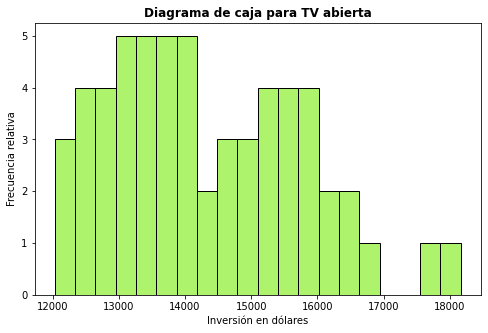

In [13]:
show_dist('TV abierta','tv_abierta','#93F03B')

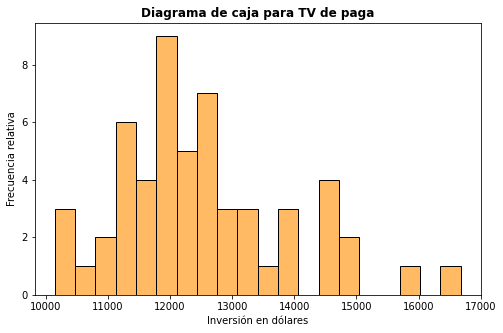

In [14]:
show_dist('TV de paga','tv_paga','#FFA32F')

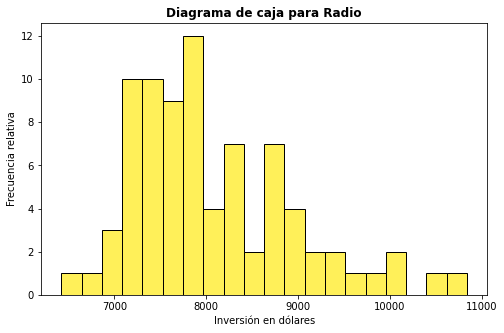

In [15]:
show_dist('Radio','radio','#FFEC21')

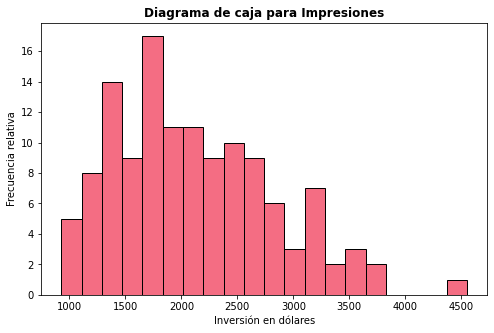

In [16]:
show_dist('Impresiones','impresiones','#F13C59')

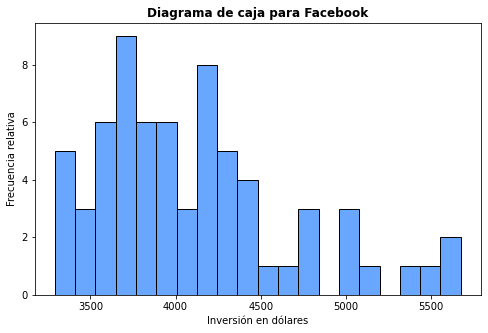

In [17]:
show_dist('Facebook','facebook','#378AFF')

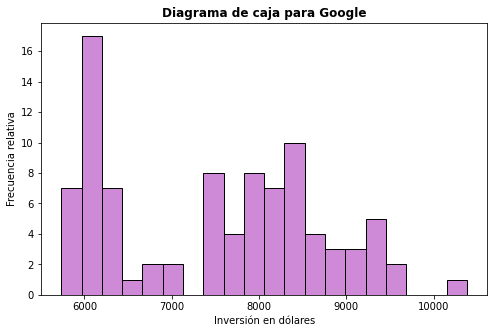

In [18]:
show_dist('Google','google','#BE61CA')

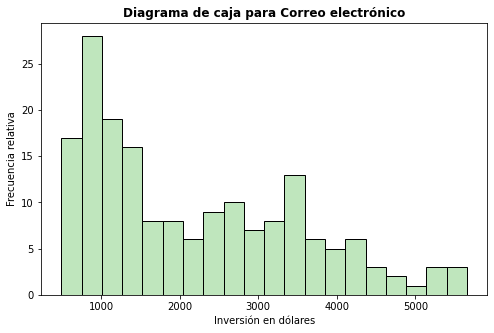

In [19]:
show_dist('Correo electr√≥nico','correo','#AADEA7')

- La mayoria de canales de inversi√≥n presentan sesgo positivo, lo que se puede explicar con las fechas de inversi√≥n.
- El comportamiento sesdago de las inversiones se debe a que la mayor parte del tiempo se mantienen activos lo canales con inversiones no tan altas, pero cuando se participa en una campa√±a publicitaria estas inversiones crecen significativamente.

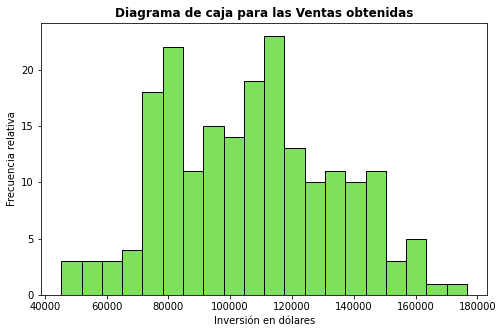

In [20]:
show_dist('las Ventas obtenidas','ventas','#52D726')

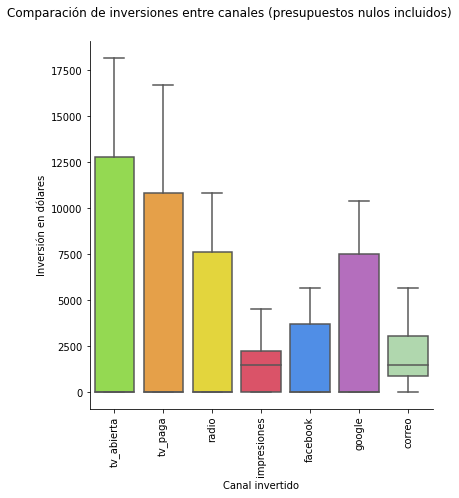

In [21]:
sns.set_palette(palette)

g = sns.catplot(x='canal',y='inversion',data=data_melt, kind='box')
g.fig.suptitle('Comparaci√≥n de inversiones entre canales (presupuestos nulos incluidos)', y=1.05, ha='center')
g.fig.set_size_inches(6,6)
g.set(xlabel='Canal invertido', ylabel='Inversi√≥n en d√≥lares')
plt.xticks(rotation=90)
plt.show()

- Los estad√≠sticos no se pueden apreciar correctamente por la presencia de los presupuestos con valor de 0 (presupuestos nulos).

In [22]:
data.describe()

tv_abierta       tv_paga         radio  impresiones     facebook  \
count    200.000000    200.000000    200.000000   200.000000   200.000000   
mean    4154.276494   3440.496211   3232.233894  1346.299509  1398.720108   
std     6562.186586   5647.247953   4008.912178  1171.510851  1982.006811   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000  1465.924196     0.000000   
75%    12767.162365  10859.182242   7653.583739  2232.334556  3710.924637   
max    18164.390870  16677.107890  10839.386410  4551.527451  5674.410000   

             google       correo         ventas  
count    200.000000   200.000000     200.000000  
mean    3418.953571  1942.386141  106681.415000  
std     3838.856199  1434.872629   27007.066833  
min        0.000000     0.000000   45323.300000  
25%        0.000000   873.803713   83969.425000  
50%        0.000000  1467.965657  108531.050000  
75%     7534.931806  3082.808291  125669.950000  
max    10383.942040  5658.230414  176683.400000

In [23]:
data_no_0 = data_melt.loc[data_melt['inversion']>0]

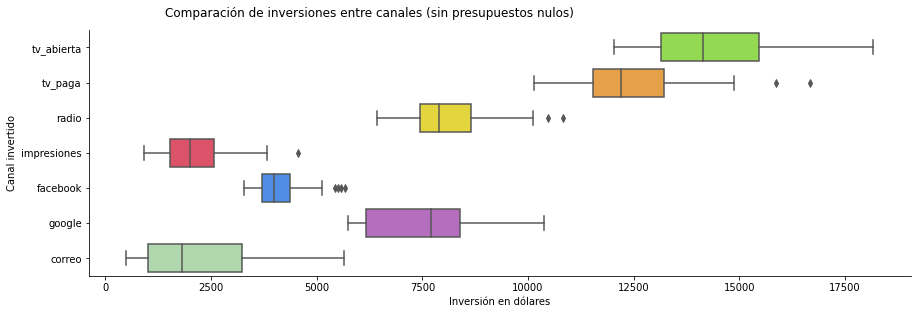

In [24]:
sns.set_palette(palette)

g = sns.catplot(x='inversion',y='canal',data=data_no_0, kind='box')
g.fig.suptitle('Comparaci√≥n de inversiones entre canales (sin presupuestos nulos)', y=1.05, ha='center')
g.fig.set_size_inches(16,4)
g.set(ylabel='Canal invertido', xlabel='Inversi√≥n en d√≥lares')
plt.show()

- Se econtraron **valores at√≠picos** para algunos de los canales en su rango intercuart√≠lico de presupuestos **distintos a cero**.
- Estos valores at√≠picos son apreciables en las distribuciones ya visualizadas.
- Se va a seguir haciendo la exploraci√≥n de datos con estos at√≠picos, pero **se retirar√°n del conjunto de datos en caso de requerir un modelo predictivo**.

In [25]:
data_no_fechas = data.drop('fecha',axis=1)

In [26]:
relations = data_no_fechas.corr()

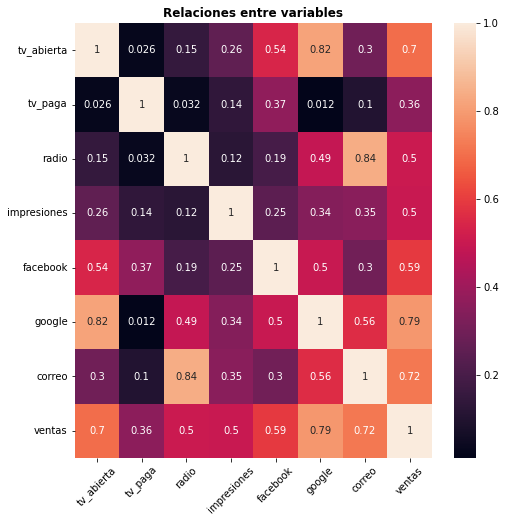

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

sns.heatmap(relations, annot=True, ax=ax)
ax.set_title('Relaciones entre variables',fontweight="bold")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

- Solamente existe un canal de inversi√≥n que **no se encuentra relacionado significativamente** a las ventas y es el de **TV de paga**.
- El canal de TV de paga **debe entrar al modelo de saturaci√≥n** para hacer el an√°lisis respectivo.
- El canal de TV de paga **no debe estar en modelo predictivo**, pues no presenta una relaci√≥n representativa con la variable objetivo (ventas).

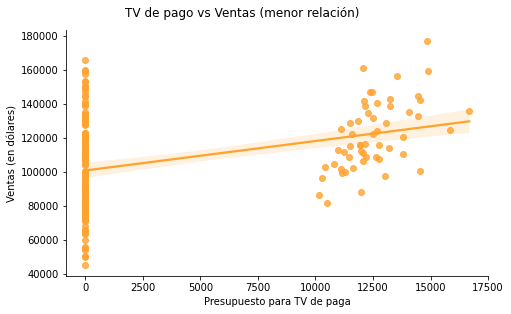

In [28]:
sns.set_palette(palette[1:2])

g = sns.lmplot(x='tv_paga',y='ventas', data=data)
g.fig.suptitle('TV de pago vs Ventas (menor relaci√≥n)', y=1.05, ha='center')
g.fig.set_size_inches(8,4)
g.set(xlabel='Presupuesto para TV de paga', ylabel='Ventas (en d√≥lares)')
plt.show()

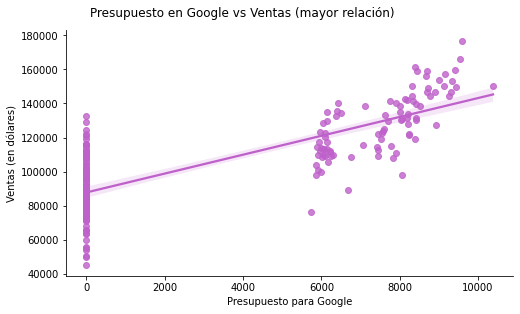

In [29]:
sns.set_palette(palette[5:6])

g = sns.lmplot(x='google',y='ventas', data=data)
g.fig.suptitle('Presupuesto en Google vs Ventas (mayor relaci√≥n)', y=1.05, ha='center')
g.fig.set_size_inches(8,4)
g.set(xlabel='Presupuesto para Google', ylabel='Ventas (en d√≥lares)')
plt.show()

- El canal de inversi√≥n de **TV de paga** presenta **mayor dispersi√≥n** a la del canal de Google (se diferencian entre si en 5% respecto a la media de las ventas).
- Pese a que **ambos canales** de inversi√≥n tienen una **desviaci√≥n de 15% a 20% de la media de ventas**, la relaci√≥n entre las inversiones destinadas a TV de paga y las ventas generadas no es tan fuerte como con el canal de inversi√≥n de Google.

In [30]:
data.columns

Index(['fecha', 'tv_abierta', 'tv_paga', 'radio', 'impresiones', 'facebook',
       'google', 'correo', 'ventas'],
      dtype='object')

In [31]:
x_ = data[['tv_abierta','tv_paga','radio','impresiones','facebook','google','correo']]
y_ = data[['ventas']]

In [32]:
import statsmodels.api as sm

statistical_model = sm.OLS(y_, x_)

In [33]:
summary = statistical_model.fit()

In [34]:
print( summary.summary() )

                                 OLS Regression Results                                
Dep. Variable:                 ventas   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.877
Method:                 Least Squares   F-statistic:                              204.7
Date:                Mon, 04 Apr 2022   Prob (F-statistic):                    1.01e-85
Time:                        17:15:59   Log-Likelihood:                         -2392.4
No. Observations:                 200   AIC:                                      4799.
Df Residuals:                     193   BIC:                                      4822.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Observaciones:
- Todos los canales de inversi√≥n considerados en el conjunto de datos **explican el comportamiento del 88% de las ventas** apr√≥ximadamente.
- Hay suficiente evidencia estad√≠stica para aceptar que los canales de TV abierta, facebook y google no tienen una **relaci√≥n  lineal** con las ventas.

- Las **relaciones** entre los canales inversi√≥n y las ventas son **diferentes**. Algunas de ellas presentan una relaci√≥n m√°s fuerte con la ventas, pero no necesariamente se trata de una relaci√≥n lineal.

## ¬øC√≥mo son las inversiones a lo largo del a√±o?

In [35]:
data['a√±o'] = data['fecha'].dt.year

In [36]:
data['mes'] = data['fecha'].dt.month

In [37]:
data.columns

Index(['fecha', 'tv_abierta', 'tv_paga', 'radio', 'impresiones', 'facebook',
       'google', 'correo', 'ventas', 'a√±o', 'mes'],
      dtype='object')

In [38]:
dict_months = { 
    1:'Enero',
    2:'Febrero',
    3:'Marzo',
    4:'Abril',
    5:'Mayo',
    6:'Junio',
    7:'Julio',
    8:'Agosto',
    9:'Septiembre',
    10:'Octubre',
    11:'Noviembre',
    12:'Diciembre'
}

In [39]:
data_names_dates = data.replace({'mes':dict_months})

In [40]:
data_names_dates.sample(3)

fecha   tv_abierta      tv_paga  radio  impresiones  facebook  \
165 2021-03-07      0.00000      0.00000    0.0     0.000000       0.0   
66  2019-04-14      0.00000      0.00000    0.0     0.000000       0.0   
41  2018-10-21  12612.11377  11125.60096    0.0  1919.933745       0.0   

          google       correo    ventas   a√±o      mes  
165     0.000000  1472.433004   91318.6  2021    Marzo  
66      0.000000     0.000000   55268.4  2019    Abril  
41   7593.533831  1427.951122  125138.4  2018  Octubre

In [41]:
data_melt_named = data_names_dates.melt(id_vars=['fecha','a√±o','mes'], var_name='canal',value_vars=data.columns[1:8],value_name='inversion')

In [42]:
data_melt_named_grouped = data_melt_named.groupby(by=['a√±o','mes'])['inversion'].sum().reset_index()

In [43]:
multi_select = alt.selection_multi(fields=['a√±o'], bind='legend')

In [44]:
alt.Chart(data_melt_named_grouped).mark_line(point = True).encode(
    x = alt.X("mes:O", title="", sort=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']),
    y = alt.Y("inversion:Q", title='Inversiones en D√≥lares'),
    tooltip=[alt.Tooltip('inversion',title='Inversi√≥n',format='~s')],
    color=alt.Color('a√±o:N', scale=alt.Scale(scheme='dark2')),
    opacity=alt.condition(multi_select, alt.value(1), alt.value(0.1))
).add_selection(
    multi_select
).properties(
    title="Inversiones totales por A√±o",
    width=800,
    height=200,
)

alt.Chart(...)

- No se identifica un mes en particular con un compartamiento de inversi√≥n diferenciado a los otros meses.

## ¬øC√≥mo est√°n compuestas las inversiones por a√±o?

In [45]:
def composition_year(year, title):
    
    df = data_melt_named.loc[data_melt_named['a√±o']==year, :]
    
    df = df.groupby(by=['canal']).agg({'inversion':'sum'}).reset_index()
    
    chart = alt.Chart(df).transform_joinaggregate(
        TotalInvestment='sum(inversion)',
    ).transform_calculate(
        PercentOfTotal="datum.inversion / datum.TotalInvestment"
    ).mark_arc(innerRadius=20, stroke="#fff").encode(
        theta=alt.Theta("PercentOfTotal:Q", stack=True),
        radius=alt.Radius("PercentOfTotal:Q",scale=alt.Scale(type="sqrt", zero=True, rangeMin=10, scheme='dark2')),
        tooltip=[alt.Tooltip('PercentOfTotal:Q',title='Proporci√≥n:',format='.2f'),
                 alt.Tooltip('inversion:Q',title='Inversi√≥n:',format='~s')],
        color="canal:N",
    ).properties(
        title=f"{title}",
        width=250,
        height=250
    ).configure_view(
    strokeWidth=0
    )
    return chart

In [46]:
composition_year(2018, 'Proporciones de inversi√≥n para el 2018')

alt.Chart(...)

In [47]:
composition_year(2019, 'Proporciones de inversi√≥n para el 2019')

alt.Chart(...)

In [48]:
composition_year(2020, 'Proporciones de inversi√≥n para el 2020')

alt.Chart(...)

In [49]:
composition_year(2021, 'Proporciones de inversi√≥n para el 2021')

alt.Chart(...)

Observaciones:
- Las inversiones en TV abierta por a√±o siempre son las que cuentan con mayor presupuesto.
- Las inversiones en campa√±as en facebook han ido decreciendo con respecto a las otras desde el 2019 hasta el 2021.
- Pese a que las inversiones en TV de paga y las ventas no est√©n fuertemente relacionadas, es una de las categorias de las que cuentan con m√°s inversi√≥n anual.

In [50]:
data_melt_cats = data_melt_named.groupby(by=['a√±o','canal']).agg({'inversion':'sum'}).reset_index()

In [51]:
alt.Chart(data_melt_cats).transform_filter(
    'datum.canal==="facebook"'
).mark_area(
    line={'color':'darkred'},
    color=alt.Gradient(
        gradient='linear',
        stops=[alt.GradientStop(color='white', offset=0),
               alt.GradientStop(color='darkred', offset=1)],
        x1=1,
        x2=1,
        y1=1,
        y2=0
    )
).encode(
    x=alt.X('a√±o:O'),
    y=alt.Y('inversion:Q'),
    tooltip=alt.Tooltip('inversion:Q',title='Inversi√≥n realizada', format='~s')
).properties(
    title="Inversiones en Facebook del 2018 al 2021",
    width=300,
    height=150,
    ).configure_view(
    strokeWidth=0
    )

alt.Chart(...)

- Las inversiones en el canal de Facebook decayeron un 52.86% con respecto a la inversi√≥n del 2018.
- La caida en las inversiones de este canal puede deberse a que la empresa ha decidido ya no seguir compitiendo en este medio para ver si las ventas obtenidas se veian afectadas o no.

### ¬øLa reducci√≥n paulatina del presupuesto en Facebook ha afectado a las ventas anuales?

In [52]:
data_grouped_sales = data.groupby(by=['a√±o']).agg({'ventas':'sum'}).reset_index()

In [53]:
alt.Chart(data_grouped_sales).mark_area(
    line={'color':'darkgreen'},
    color=alt.Gradient(
        gradient='linear',
        stops=[alt.GradientStop(color='white', offset=0),
               alt.GradientStop(color='darkgreen', offset=1)],
        x1=1,
        x2=1,
        y1=1,
        y2=0
    )
).encode(
    x=alt.X('a√±o:O'),
    y=alt.Y('ventas:Q'),
    tooltip=alt.Tooltip('ventas:Q',title='Venta obtenida', format='~s')
).properties(
    title="Ventas anuales del 2018 al 2021",
    width=300,
    height=200,
    ).configure_view(
    strokeWidth=0
    )

alt.Chart(...)

- Se comprueba que, pese a que la inversi√≥n en el canal de facebook se encuentra relacionada a las ventas de manera significativa. La reducci√≥n del presupuesto en este canal no ha representado una variaci√≥n notable en las ventas anuales

## <p style="background: linear-gradient(to right,#dec9e9, #6247aa); color:white; font-size:150%; text-align:Center; border-radius: 20px 20px; margin: 0px 0px 0px 0px">  üë®‚Äçüíª Modelado  </p>

In [54]:
from scipy.signal import convolve2d
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted, check_array

- Esta clase es la que hace las transformaciones para obtener las coordenadas de las curvas de saturaci√≥n.
- Usa el hiper par√°metro a para modelar la saturaci√≥n de la curva.

In [55]:
class ExponentialSaturation (BaseEstimator, TransformerMixin):
    def __init__ (self, a = 1.):
        self.a = a
        
    def fit(self, X, y = None):
        X = check_array(X) 
        self._check_n_features(X, reset = True)
        return self
    
    def transform (self, X):
        check_is_fitted (self)
        X = check_array (X)
        self._check_n_features (X, reset = False)
        
        return (X / (X + (X.mean() * self.a)))

- Esta clase modela el arrastre en cada varaible en base a la fuerza y arrastre elegido.
- El arrastre y la fuerza pueden ser definidos por negocio. Pero, en este caso se optimizar√° con la librer√≠a Optuna por no contar con restricciones de negocio.

In [56]:
class ExponentialCarryover(BaseEstimator, TransformerMixin): 
    def __init__(self, strength = 0.5, length = 1):
        self.strength = strength
        self.length = length
        
    def fit(self, X, y = None):
        X = check_array(X)
        self._check_n_features(X, reset=True)
        self.sliding_window_ = (
            self.strength ** np.arange(self.length + 1)
        ).reshape(-1, 1)
        
        return self

    def transform(self, X: np.ndarray):
        check_is_fitted(self)
        X = check_array(X)
        self._check_n_features(X, reset=False)
        convolution = convolve2d(X, self.sliding_window_)
        if self.length > 0:
            convolution = convolution[: -self.length]
            
        return convolution

## üë®‚Äçüîß Pipelines

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

- Cada canal modela su efecto de arrastre y luego procede a ser calculada su saturaci√≥n:

In [58]:
adstock = ColumnTransformer([
        ('correo_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
            ('saturation', ExponentialSaturation())
        ]), ['correo']),
        ('facebook_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
            ('saturation', ExponentialSaturation())
        ]), ['facebook']),
        ('google_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
            ('saturation', ExponentialSaturation())
        ]), ['google']),
        ('impresiones_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
            ('saturation', ExponentialSaturation())
        ]), ['impresiones']),
        ('radio_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
            ('saturation', ExponentialSaturation())
        ]), ['radio']),
        ('tvabierta_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
            ('saturation', ExponentialSaturation())
        ]), ['tv_abierta']),
        ('tvpaga_pipe', Pipeline([
            ('carryover', ExponentialCarryover()),
            ('saturation', ExponentialSaturation())
        ]), ['tv_paga'])
])

- Se a√±ade el modelo de Regresi√≥n Lineal porque es el que se usa conencionalmente despu√©s de haber realizado el an√°lisis de saturaci√≥n.
- En este caso, el objetivo no es realizar predicciones, sino, analizar las saturaciones obtenidas.

In [59]:
from sklearn.linear_model import LinearRegression

model = Pipeline([
    ('adstock', adstock),
    ('estimator', LinearRegression())
])

In [60]:
x = data.drop('ventas', axis=1)
y= data['ventas']

In [61]:
%%capture
model.fit(x,y)

## üìà Optimizaci√≥n de hiper par√°metros

In [62]:
from optuna.integration import OptunaSearchCV
from optuna.distributions import UniformDistribution, IntUniformDistribution
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

print(cross_val_score(model, x, y, cv=TimeSeriesSplit()).mean())

0.7186041006756188


- Se optimizan los hiper par√°metros de cada pipeline.
- Los s√≠mbolos "__" indican entrar en la jerarqu√≠a del transformador colocado como prefijo.

In [63]:
%%capture
tuned_model = OptunaSearchCV(
    estimator=model,
    param_distributions={
        # Correo
        'adstock__correo_pipe__carryover__strength':UniformDistribution(0, 1),
        'adstock__correo_pipe__carryover__length':IntUniformDistribution(0, 6),
        'adstock__correo_pipe__saturation__a': UniformDistribution(0,2),
        # Facebook
        'adstock__facebook_pipe__carryover__strength':UniformDistribution(0, 1),
        'adstock__facebook_pipe__carryover__length':IntUniformDistribution(0, 6),
        'adstock__facebook_pipe__saturation__a': UniformDistribution(0,2),
        # Google
        'adstock__google_pipe__carryover__strength':UniformDistribution(0, 1),
        'adstock__google_pipe__carryover__length':IntUniformDistribution(0, 6),
        'adstock__google_pipe__saturation__a': UniformDistribution(0,2),
        # Impresiones
        'adstock__impresiones_pipe__carryover__strength':UniformDistribution(0, 1),
        'adstock__impresiones_pipe__carryover__length':IntUniformDistribution(0, 6),
        'adstock__impresiones_pipe__saturation__a': UniformDistribution(0,2),
        # Radio
        'adstock__radio_pipe__carryover__strength':UniformDistribution(0, 1),
        'adstock__radio_pipe__carryover__length':IntUniformDistribution(0, 6),
        'adstock__radio_pipe__saturation__a': UniformDistribution(0,2),
        # TV abierta
        'adstock__tvabierta_pipe__carryover__strength':UniformDistribution(0, 1),
        'adstock__tvabierta_pipe__carryover__length':IntUniformDistribution(0, 6),
        'adstock__tvabierta_pipe__saturation__a': UniformDistribution(0,2),
        # TV de paga
        'adstock__tvpaga_pipe__carryover__strength':UniformDistribution(0, 1),
        'adstock__tvpaga_pipe__carryover__length':IntUniformDistribution(0, 6),
        'adstock__tvpaga_pipe__saturation__a': UniformDistribution(0,2),
    },
    #n_trials=1000, (mejor redimiento)
    n_trials=10,
    cv=TimeSeriesSplit(),
    random_state=10
)

In [64]:
%%capture
tuned_model.fit(x,y)

[I 2022-04-04 17:16:09,639] A new study created in memory with name: no-name-47650678-1938-467d-afec-93905f1874e8
[I 2022-04-04 17:16:10,010] Trial 0 finished with value: -0.11587038367708997 and parameters: {'adstock__correo_pipe__carryover__strength': 0.09242664244599941, 'adstock__correo_pipe__carryover__length': 5, 'adstock__correo_pipe__saturation__a': 0.6275767572742299, 'adstock__facebook_pipe__carryover__strength': 0.23126986862002263, 'adstock__facebook_pipe__carryover__length': 1, 'adstock__facebook_pipe__saturation__a': 0.8332499941074196, 'adstock__google_pipe__carryover__strength': 0.7647446160554672, 'adstock__google_pipe__carryover__length': 5, 'adstock__google_pipe__saturation__a': 0.4841537079117917, 'adstock__impresiones_pipe__carryover__strength': 0.8069344716376637, 'adstock__impresiones_pipe__carryover__length': 6, 'adstock__impresiones_pipe__saturation__a': 0.06942069732340705, 'adstock__radio_pipe__carryover__strength': 0.21567891413066032, 'adstock__radio_pipe__

In [65]:
print(cross_val_score(tuned_model, x, y, cv = TimeSeriesSplit ()))

[I 2022-04-04 17:16:15,855] A new study created in memory with name: no-name-01634c2f-f211-47fe-991b-11e9c38da9aa
[I 2022-04-04 17:16:16,535] Trial 0 finished with value: -10.299128223201137 and parameters: {'adstock__correo_pipe__carryover__strength': 0.09242664244599941, 'adstock__correo_pipe__carryover__length': 5, 'adstock__correo_pipe__saturation__a': 0.6275767572742299, 'adstock__facebook_pipe__carryover__strength': 0.23126986862002263, 'adstock__facebook_pipe__carryover__length': 1, 'adstock__facebook_pipe__saturation__a': 0.8332499941074196, 'adstock__google_pipe__carryover__strength': 0.7647446160554672, 'adstock__google_pipe__carryover__length': 5, 'adstock__google_pipe__saturation__a': 0.4841537079117917, 'adstock__impresiones_pipe__carryover__strength': 0.8069344716376637, 'adstock__impresiones_pipe__carryover__length': 6, 'adstock__impresiones_pipe__saturation__a': 0.06942069732340705, 'adstock__radio_pipe__carryover__strength': 0.21567891413066032, 'adstock__radio_pipe__c

[0.77563738 0.81110549 0.68457049 0.86780318 0.8617127 ]


In [66]:
print(tuned_model.best_params_)

{'adstock__correo_pipe__carryover__strength': 0.07639040045823209, 'adstock__correo_pipe__carryover__length': 3, 'adstock__correo_pipe__saturation__a': 0.4224094050472629, 'adstock__facebook_pipe__carryover__strength': 0.46426977591480534, 'adstock__facebook_pipe__carryover__length': 5, 'adstock__facebook_pipe__saturation__a': 1.084799417174083, 'adstock__google_pipe__carryover__strength': 0.35361945410371953, 'adstock__google_pipe__carryover__length': 3, 'adstock__google_pipe__saturation__a': 1.1724525925384164, 'adstock__impresiones_pipe__carryover__strength': 0.16801354644602895, 'adstock__impresiones_pipe__carryover__length': 4, 'adstock__impresiones_pipe__saturation__a': 1.3422153411317188, 'adstock__radio_pipe__carryover__strength': 0.16162966057840944, 'adstock__radio_pipe__carryover__length': 3, 'adstock__radio_pipe__saturation__a': 1.6586979230989474, 'adstock__tvabierta_pipe__carryover__strength': 0.6585643238935249, 'adstock__tvabierta_pipe__carryover__length': 0, 'adstock__

### üî¢ Coeficientes e intercepci√≥n de la regresi√≥n lineal

In [67]:
print (tuned_model.best_estimator_.named_steps['estimator']. coef_)

[51010.56120644  3708.41213053 25190.65302353 13313.26282329
  7838.80949342 34195.07748354 25010.88958897]


In [68]:
print (tuned_model.best_estimator_.named_steps ['estimator'].intercept_)

43513.20973050304


## üõ†Ô∏è Usando el modelo

- Se concatenan los valores de saturaci√≥n conarrastre de cada categor√≠a al dataframe inicial:

In [69]:
data[['correo_sat','facebook_sat','google_sat','impresiones_sat','radio_sat','tv_abierta_sat','tv_paga_sat']] = tuned_model.best_estimator_.named_steps['adstock'].transform(x)

In [70]:
data.sample(6)

fecha   tv_abierta      tv_paga        radio  impresiones  \
64  2019-03-31      0.00000      0.00000  7934.598624     0.000000   
106 2020-01-19  12393.95412      0.00000     0.000000  2333.332505   
127 2020-06-14  15168.16422  12387.54832  9391.425027     0.000000   
110 2020-02-16  16794.35050      0.00000  8503.695433  2458.413485   
79  2019-07-14      0.00000      0.00000     0.000000  2154.814597   
199 2021-10-31      0.00000      0.00000     0.000000  1088.827550   

        facebook       google       correo    ventas   a√±o  mes  correo_sat  \
64      0.000000     0.000000  2514.905418   94516.1  2019    3    0.745054   
106  3706.024760  7772.543576  1166.666252  115097.2  2020    1    0.580247   
127  5674.410000  9315.044909  3072.271392  147039.0  2020    6    0.784341   
110  5059.715849  9550.961020  5550.870019  165922.5  2020    2    0.866199   
79      0.000000     0.000000  1077.412415   82455.7  2019    7    0.572357   
199     0.000000     0.000000   544.416689   72502.1  2021   10    0.418046   

     facebook_sat  google_sat  impresiones_sat  radio_sat  tv_abierta_sat  \
64       0.348603    0.057288         0.158768   0.555221        0.000000   
106      0.640894    0.571165         0.549991   0.000000        0.667827   
127      0.713436    0.686060         0.245491   0.600043        0.711024   
110      0.686999    0.641246         0.573922   0.571958        0.731492   
79       0.365189    0.189735         0.542266   0.037057        0.000000   
199      0.237837    0.157498         0.347497   0.036101        0.000000   

     tv_paga_sat  
64      0.282708  
106     0.215666  
127     0.575855  
110     0.424979  
79      0.437810  
199     0.221372

- La siguietne funci√≥n grafica la curva de sturaci√≥n de la categor√≠a que recibe como argumento.

In [71]:
def show_saturation(title,color,cat, cat_sat):
    chart = alt.Chart(data).mark_circle(size=40,stroke='#000000',fill=color, strokeWidth=0.3).encode(
        alt.X(cat, title='Inversi√≥n'),
        alt.Y(cat_sat, title='Saturaci√≥n (Adbug)')#, scale=alt.Scale(domain=( 0, 1 )))
    ).properties(
        title=f'{title}',
        width=230,
        height=230
    )
    return chart

In [72]:
chart_tv_abierta = show_saturation('Canal: TV abierta', palette[0], 'tv_abierta:Q','tv_abierta_sat:Q')

In [73]:
chart_tv_paga = show_saturation('Canal: TV de paga', palette[1], 'tv_paga:Q','tv_paga_sat:Q')

In [74]:
chart_radio = show_saturation('Canal: Radio', palette[2], 'radio:Q','radio_sat:Q')

In [75]:
chart_impresiones = show_saturation('Canal: Impresiones', palette[3], 'impresiones:Q','impresiones_sat:Q')

In [76]:
chart_google = show_saturation('Canal: Google', palette[4], 'google:Q','google_sat:Q')

In [77]:
chart_facebook = show_saturation('Canal: Facebook', palette[5], 'facebook:Q','facebook_sat:Q')

In [78]:
chart_correo = show_saturation('Canal: Correo electr√≥nico', palette[6], 'correo:Q','correo_sat:Q')

In [79]:
(chart_tv_abierta | chart_tv_paga | chart_google)

alt.HConcatChart(...)

In [80]:
(chart_facebook | chart_impresiones | chart_correo | chart_radio)

alt.HConcatChart(...)

## üîé Interpretaci√≥n al √∫ltimo a√±o

- Los siguientes pasos son para formatear la data a una estructura sencilla de interpretar por Altair. Esto para lograr un gr√°fico interactivo que permita analizar las categor√≠as seleccionadas √∫nicamente.

In [81]:
data_melt_named_sales = data_names_dates.melt(id_vars=['fecha','a√±o','mes'], var_name='categoria',value_vars=data.columns[1:9],value_name='monto')

In [82]:
data_melt_named_sales_2020 = data_melt_named_sales[data_melt_named_sales.a√±o==2020].drop(['fecha','a√±o'], axis=1)

In [83]:
data_melt_named_sales_2020_g = data_melt_named_sales_2020.groupby(by=['mes','categoria'])[['monto']].sum().reset_index()

In [84]:
df_no_sales = data_melt_named_sales_2020_g[data_melt_named_sales_2020_g.categoria != 'ventas']

In [85]:
df_sales = data_melt_named_sales_2020_g[data_melt_named_sales_2020_g.categoria == 'ventas']

In [86]:
multi_select = alt.selection_multi(fields=['categoria'], bind='legend')

In [87]:
upper = alt.Chart(df_no_sales).mark_line(point = True).encode(
    x = alt.X("mes:O", title="", axis=alt.Axis(labels=False),sort=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']),
    y = alt.Y("monto:Q", title='Inversi√≥n',axis=alt.Axis(titlePadding=15)),
    tooltip=[alt.Tooltip('monto:Q',title='Monto:',format='~s')],
    color=alt.Color('categoria:N', scale=alt.Scale(scheme='dark2')),
    opacity=alt.condition(multi_select, alt.value(1), alt.value(0.2))
).add_selection(
    multi_select
).properties(
    title="Inversiones y ventas totales (2020)",
    width=650,
    height=200,
).interactive()

In [88]:
lower = alt.Chart(df_sales).mark_area().encode(
    x = alt.X("mes:O", title="",axis=alt.Axis(labelFontSize=12), sort=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']),
    y = alt.Y("monto:Q",title='Ventas',axis=alt.Axis(titlePadding=15)),
    tooltip=[alt.Tooltip('monto:Q',title='Monto:',format='~s')],
    color=alt.Color('categoria:N', scale=alt.Scale(scheme='dark2'),legend=alt.Legend(title="Categorias:")),
    opacity=alt.condition(multi_select, alt.value(1), alt.value(0.1))
).properties(
    title="",
    width=650,
    height=100,
)

In [89]:
alt.vconcat(upper, lower).configure_title(
    fontSize = 15,
    anchor = 'start',
    dy=-15,
)

alt.VConcatChart(...)

‚òùÔ∏è **NOTA:** *El siguiente gr√°fico contiene unaleyenda interactiva. Se puede hacer click en la categoria y manter pulsado shift para seleccionar alguna otra.*

## <p style="background: linear-gradient(to right,#023e8a, #ade8f4); color:white; font-size:150%; text-align:Center; border-radius: 20px 20px; margin: 0px 0px 0px 0px">  üìù Conclusiones  </p>

- Se afirma que los **presupuestos de Facebook, Impresiones, Email/Correo electr√≥nico y Radio** todav√≠a tienen un **impacto representativo en las ventas** por no estar muy saturados.
- Pese a que las inversiones en **TV abierta** se encuentran **casi saturadas**, siguen siendo inversiones que **impactan a las ventas generadas** en cada mes y a√±o.
- El canal de **TV de paga es el m√°s saturado de todos** los dem√°s canales. Es conveniente ir **reduciendo sus inversiones paulatinamente** para no perder presencia tan bruscamente en dicho canal.